# Linear Regression

## Geely Automotive Pricing Model

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)


In [2]:
# hide the warnings
import warnings
warnings.filterwarnings('ignore')

### Read CSV file

In [3]:
df = pd.read_csv("CarPrice_Assignment.csv")

In [4]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [5]:
df.shape

(205, 26)

## Data Cleaning & Manipulation 

In [6]:
# Check the null value in each columns
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [7]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In named __CarName__ which is __comprised__ of __two parts__ - the __first word__ is the name of __'car company'__ and the __second__ is the __'car model'__. For example, __chevrolet impala__ has __'chevrolet'__ as the __car company name__ and __'impala'__ as the __car model name__. we __consider only company name__ as the independent variable for model building. 

In [9]:
df['CarName'].unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

In [10]:
df['CarName']= df['CarName'].str.split(' ', expand=True)

In [11]:
df['CarName'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In __companies car name__ there is __spelling mistake__(maxda and mazda) and case sensitive(Nissan and nissan). So we need to __handle__ both of this.

In [12]:
df['CarName']=df['CarName'].replace({
    'maxda':'mazda',
    'Nissan':'nissan',
    'porcshce':'porsche',
    'toyouta':'toyota',
    'vokswagen':'volkswagen',
    'vw':'volkswagen'
    
})

In [13]:
# changing the datatype of symboling as it is categorical variable as per dictionary file
df['symboling']=df['symboling'].astype(str)

In [14]:
# drop unnecesarry column 
df.drop('car_ID', axis=1, inplace=True)

## Exploratory Data Analysis (EDA)

### Univariate Analysis

Let visualize each column in deep for better understanding

In [15]:
def unistats(df):
    output_df = pd.DataFrame(columns=['Count','Missing','NUnique','Unique','Dtype', 'Numeric','Mode','Mean','Min','25%','Median','75%','Max','Std', 'Skew', 'Kurt'])


    for col in df:
        if pd.api.types.is_numeric_dtype(df[col]):
            output_df.loc[col] = [df[col].count(), df[col].isnull().sum(), df[col].nunique(), df[col].unique(), df[col].dtype, pd.api.types.is_numeric_dtype(df[col]),
                                  df[col].mode().values[0], df[col].mean(), df[col].min(), df[col].quantile(0.25), df[col].median(), df[col].quantile(0.75),
                                  df[col].max(), df[col].std(),df[col].skew(), df[col].kurt()]
        else:
            output_df.loc[col] = [df[col].count(),df[col].isnull().sum(),df[col].nunique(), df[col].unique(), df[col].dtype, pd.api.types.is_numeric_dtype(df[col]),
                                  df[col].mode().values[0],'','','','','','','','','']
    return output_df.sort_values(by=['Numeric','Skew', 'NUnique'], ascending=False)

In [16]:
unistats(df)

,Count,Missing,NUnique,Unique,Dtype,Numeric,Mode,Mean,Min,25%,Median,75%,Max,Std,Skew,Kurt
compressionratio,205,0,32,"[9.0, 10.0, 8.0, 8.5, 8.3, 7.0, 8.8, 9.5, 9.6,...",float64,True,9,10.1425,7,8.6,9,9.4,23,3.97204,2.61086,5.23305
enginesize,205,0,44,"[130, 152, 109, 136, 131, 108, 164, 209, 61, 9...",int64,True,92,126.907,61,97,120,141,326,41.6427,1.94766,5.30568
price,205,0,189,"[13495.0, 16500.0, 13950.0, 17450.0, 15250.0, ...",float64,True,5572,13276.7,5118,7788,10295,16503,45400,7988.85,1.77768,3.05165
horsepower,205,0,59,"[111, 154, 102, 115, 110, 140, 160, 101, 121, ...",int64,True,68,104.117,48,70,95,116,288,39.5442,1.40531,2.68401
wheelbase,205,0,53,"[88.6, 94.5, 99.8, 99.4, 105.8, 99.5, 101.2, 1...",float64,True,94.5,98.7566,86.6,94.5,97,102.4,120.9,6.02178,1.05021,1.01704
carwidth,205,0,44,"[64.1, 65.5, 66.2, 66.4, 66.3, 71.4, 67.9, 64....",float64,True,63.8,65.9078,60.3,64.1,65.5,66.9,72.3,2.1452,0.904003,0.702764
curbweight,205,0,171,"[2548, 2823, 2337, 2824, 2507, 2844, 2954, 308...",int64,True,2385,2555.57,1488,2145,2414,2935,4066,520.68,0.681398,-0.0428538
citympg,205,0,29,"[21, 19, 24, 18, 17, 16, 23, 20, 15, 47, 38, 3...",int64,True,31,25.2195,13,19,24,30,49,6.54214,0.663704,0.578648
highwaympg,205,0,30,"[27, 26, 30, 22, 25, 20, 29, 28, 53, 43, 41, 3...",int64,True,25,30.7512,16,25,30,34,54,6.88644,0.539997,0.44007
carlength,205,0,75,"[168.8, 171.2, 176.6, 177.3, 192.7, 178.2, 176...",float64,True,157.3,174.049,141.1,166.3,173.2,183.1,208.1,12.3373,0.155954,-0.0828949


## Univariate Plot

In [17]:
def univaritePlot(df,col,vartype):
    if vartype==0:
        sns.set(style="darkgrid")
        fig, ax=plt.subplots(nrows =1,ncols=2,figsize=(20,8))
        ax[0].set_title(col.upper() + " DISTRIBUTION PLOT")
        sns.distplot(df[col],ax=ax[0])
        ax[1].set_title(col.upper() + " BOX PLOT")
        sns.boxplot(data =df, x=col,ax=ax[1],orient='v')
        plt.show()
    if vartype==1:
        fig, ax = plt.subplots()
        fig.set_size_inches(len(df[col].unique())+10 , 7)
        ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index) 
        for p in ax.patches:
            percentage = '{:.1f}%'.format(100 * p.get_height()/len(df))
            x = p.get_x() + p.get_width() / 2 - 0.05
            y = p.get_y() + p.get_height()
            ax.annotate(percentage, (x, y), size = 12)

### Continuous variables

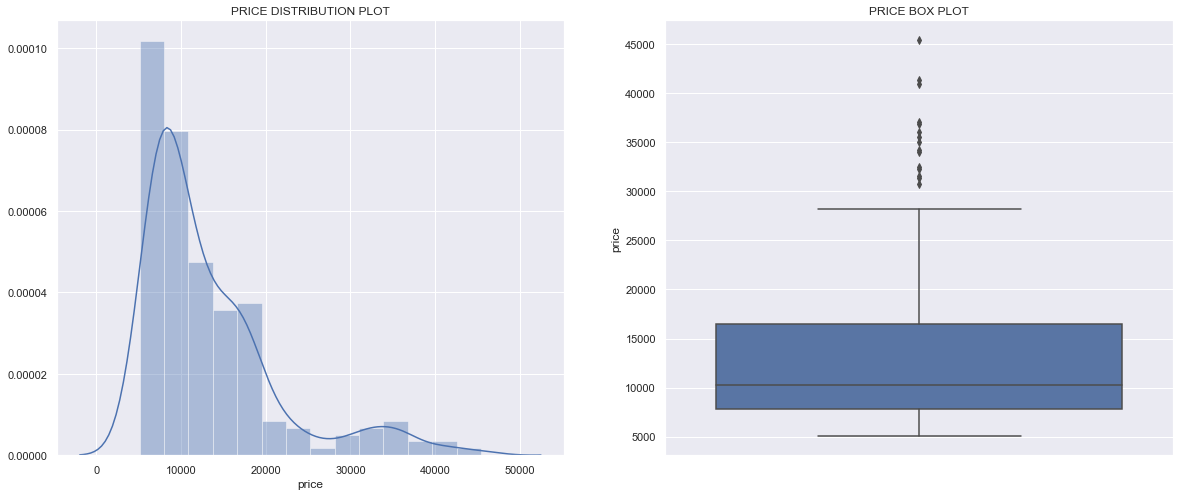

In [18]:
univaritePlot(df=df,col='price',vartype=0)

Insight: Most of the Prices are distributed between 8000 to 18000

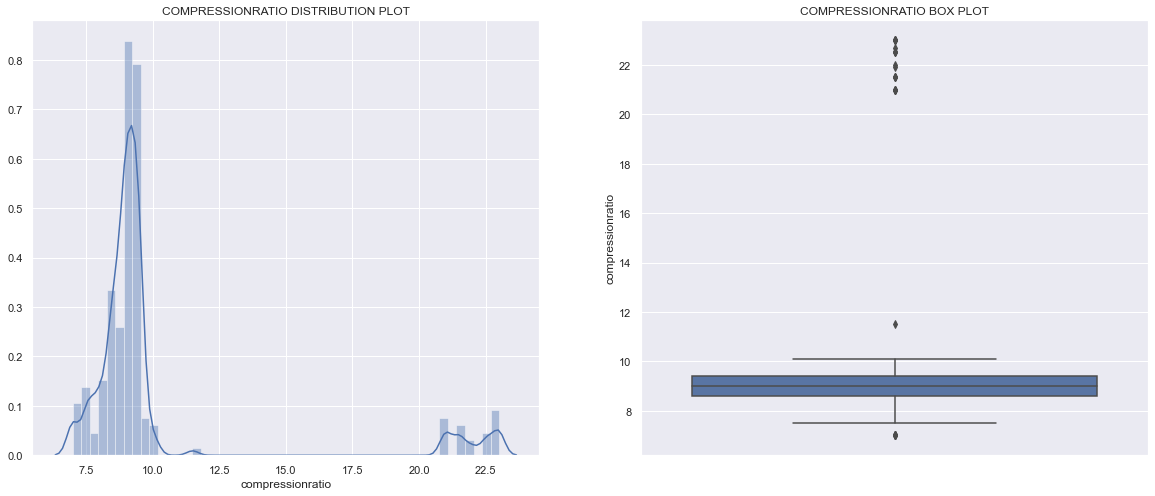

In [19]:
univaritePlot(df=df,col='compressionratio',vartype=0)

Insight: Most of the compressionratio are distributed between 7.5 to 10 and also find the outlier in it. so need to handle outlier.

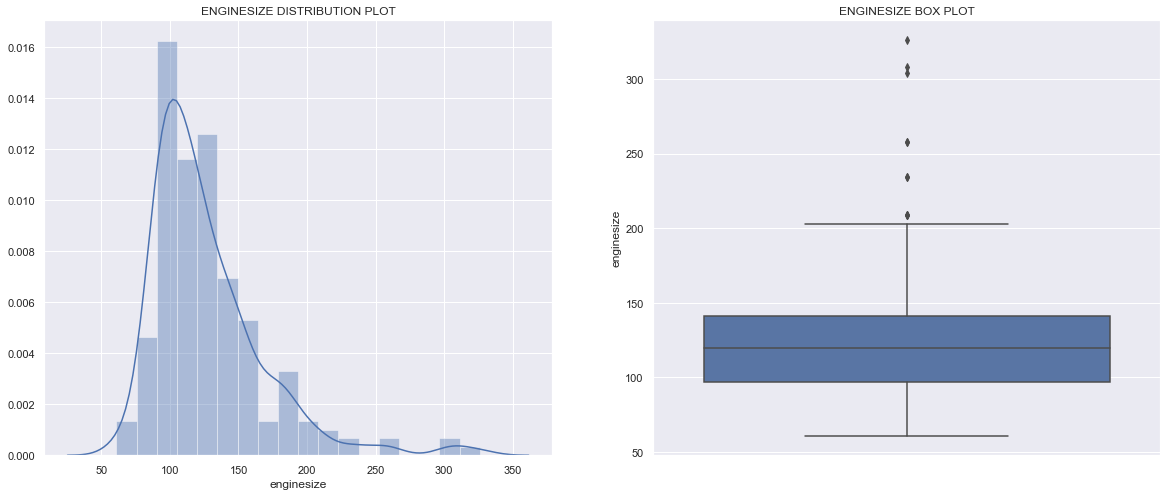

In [20]:
univaritePlot(df=df,col='enginesize',vartype=0)

Insight: Most of the enginesize are distributed between 95 to 180 and also find the outlier in it. so need to handle outlier.

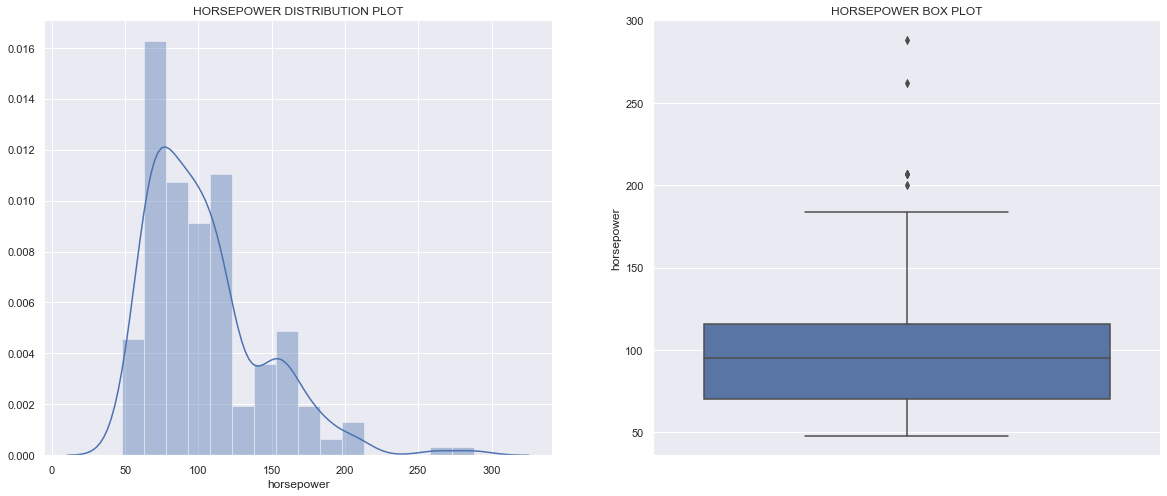

In [21]:
univaritePlot(df=df,col='horsepower',vartype=0)

Insight: Most of the horsepower are distributed between 70 to 130 and also find the outlier in it. so need to handle outlier.

### Categorical Variables

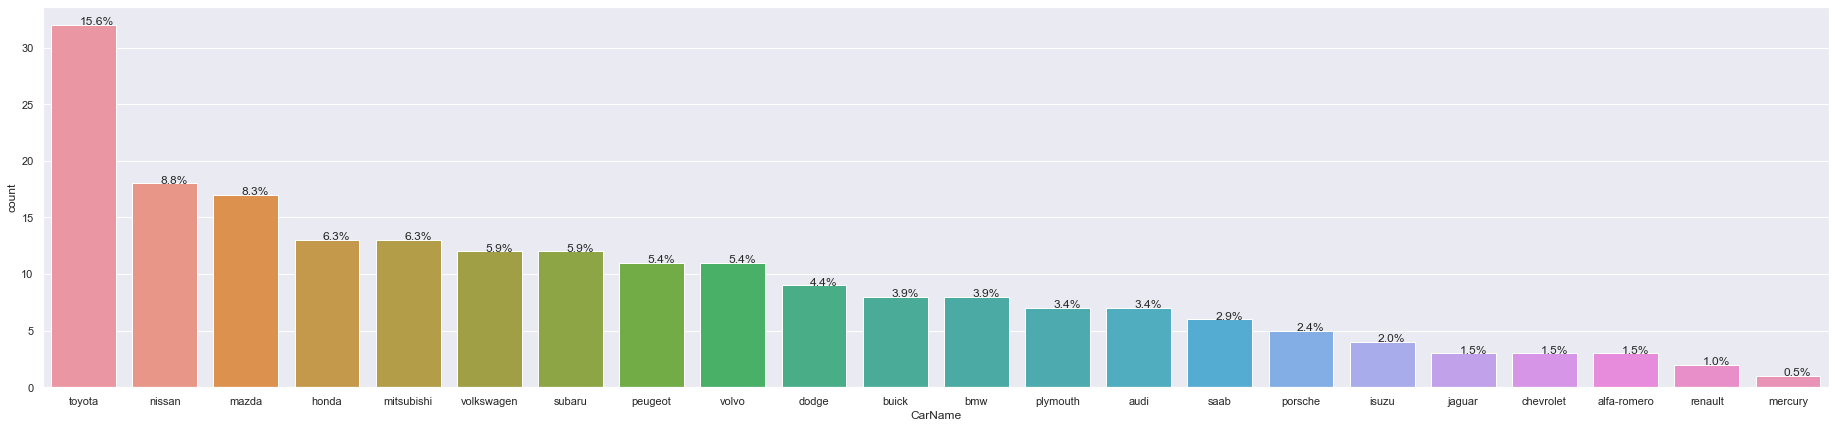

In [22]:
univaritePlot(df=df,col='CarName',vartype=1)

Insight: Toyota is most liked car while mercury is least

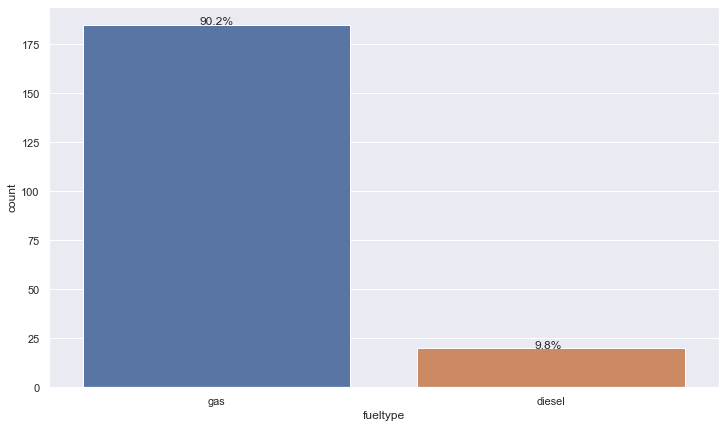

In [23]:
univaritePlot(df=df,col='fueltype',vartype=1)

Insight: Number of gas car is more than diesel cars

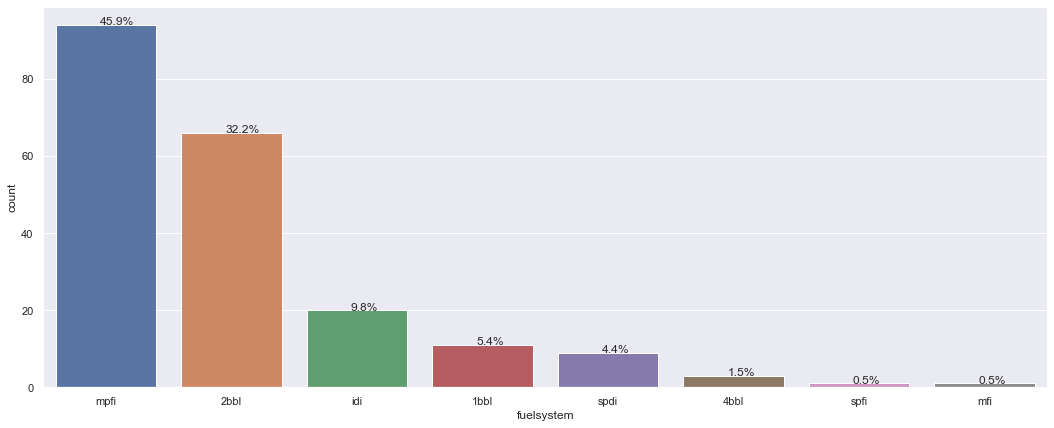

In [24]:
univaritePlot(df=df,col='fuelsystem',vartype=1)

Insight:mpfi is heighest fuelsystem used in the car

## Bivariate Analysis

In [25]:
# Find the correlation between variables
df.corr()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
wheelbase,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920
carwidth,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325
carheight,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119336
curbweight,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305
enginesize,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145
boreratio,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012,0.553173
stroke,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,-0.043931,0.079443
compressionratio,0.249786,0.158414,0.181129,0.261214,0.151362,0.028971,0.005197,0.186110,1.000000,-0.204326,-0.435741,0.324701,0.265201,0.067984
horsepower,0.353294,0.552623,0.640732,-0.108802,0.750739,0.809769,0.573677,0.080940,-0.204326,1.000000,0.131073,-0.801456,-0.770544,0.808139


### calculate the relation between the independent variables and dependent variables

In [26]:
def anova(df, feature, label):
    groups = df[feature].unique()
    df_grouped = df.groupby(feature)
    group_labels = []
    for g in groups:
        g_list = df_grouped.get_group(g)
        group_labels.append(g_list[label])
        
    return stats.f_oneway(*group_labels)



def bivstats(df,label):
    output_df = pd.DataFrame(columns=['stat','+/-','Effect Size','pvalue'])
    
    for col in df:
        if not col == label:
            if df[col].isnull().sum() == 0:
                if pd.api.types.is_numeric_dtype(df[col]):
                    r, p = stats.pearsonr(df[label], df[col])
                    output_df.loc[col] = ['r',np.sign(r), abs(round(r,3)), round(p,20)]
                    
                else:
                    F, p = anova(df[[col, label]], col, label)
                    output_df.loc[col] = ['F','', abs(round(F,3)), round(p,6)]
            else:
                output_df.loc[col] = [np.nan, np.nan,np.nan,np.nan]
                
    return output_df.sort_values(['stat','Effect Size' ], ascending=False)

In [27]:
bivstats(df, 'price')

,stat,+/-,Effect Size,pvalue
enginesize,r,1,0.874,0.000000e+00
curbweight,r,1,0.835,0.000000e+00
horsepower,r,1,0.808,0.000000e+00
carwidth,r,1,0.759,0.000000e+00
highwaympg,r,-1,0.698,0.000000e+00
citympg,r,-1,0.686,0.000000e+00
carlength,r,1,0.683,0.000000e+00
wheelbase,r,1,0.578,1.200000e-19
boreratio,r,1,0.553,7.910000e-18
carheight,r,1,0.119,8.832832e-02


### Continous Variable

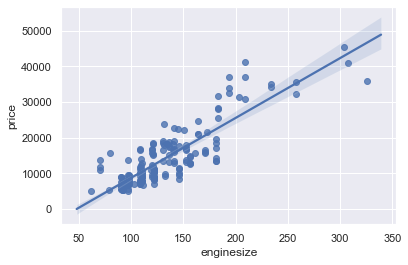

In [28]:
sns.regplot(x="enginesize", y="price", data=df)

Insight: engine-size is highly correlated with price and it is good predictor to be used in create the model

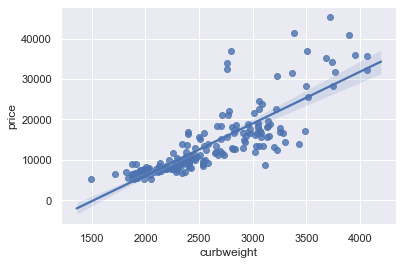

In [29]:
sns.regplot(x="curbweight", y="price", data=df)

Insight: curbweight is highly correlated with price and it is good predictor to be used in create the model

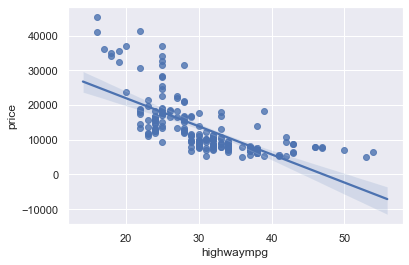

In [30]:
sns.regplot(x="highwaympg", y="price", data=df)

Insight: engine-size is highly negative correlated with price and it is good predictor to be used in create the model

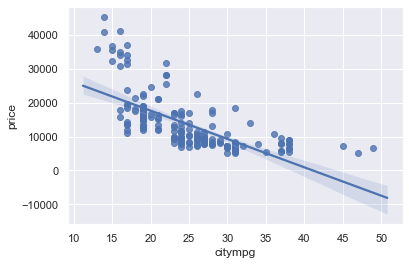

In [31]:
sns.regplot(x="citympg", y="price", data=df)

Insight: citympg is highly correlated with price and it is good predictor to be used in create the model

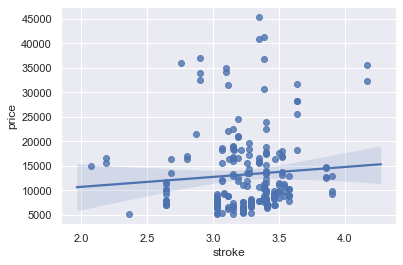

In [32]:
sns.regplot(x="stroke", y="price", data=df)

Insight: stroke is not correlated with price and it is not a good predictor to be used in create the model

### Categorical Variables

In [33]:
def catePlot(var_list):
    plt.figure(figsize=(20, 15))
    for var in var_list:
        plt.subplot(3,4,var_list.index(var)+1)
        sns.boxplot(x = var, y = 'price', data = df)
    plt.show()

In [34]:
cate = list(df.select_dtypes(include='object'))
cate.remove('CarName')

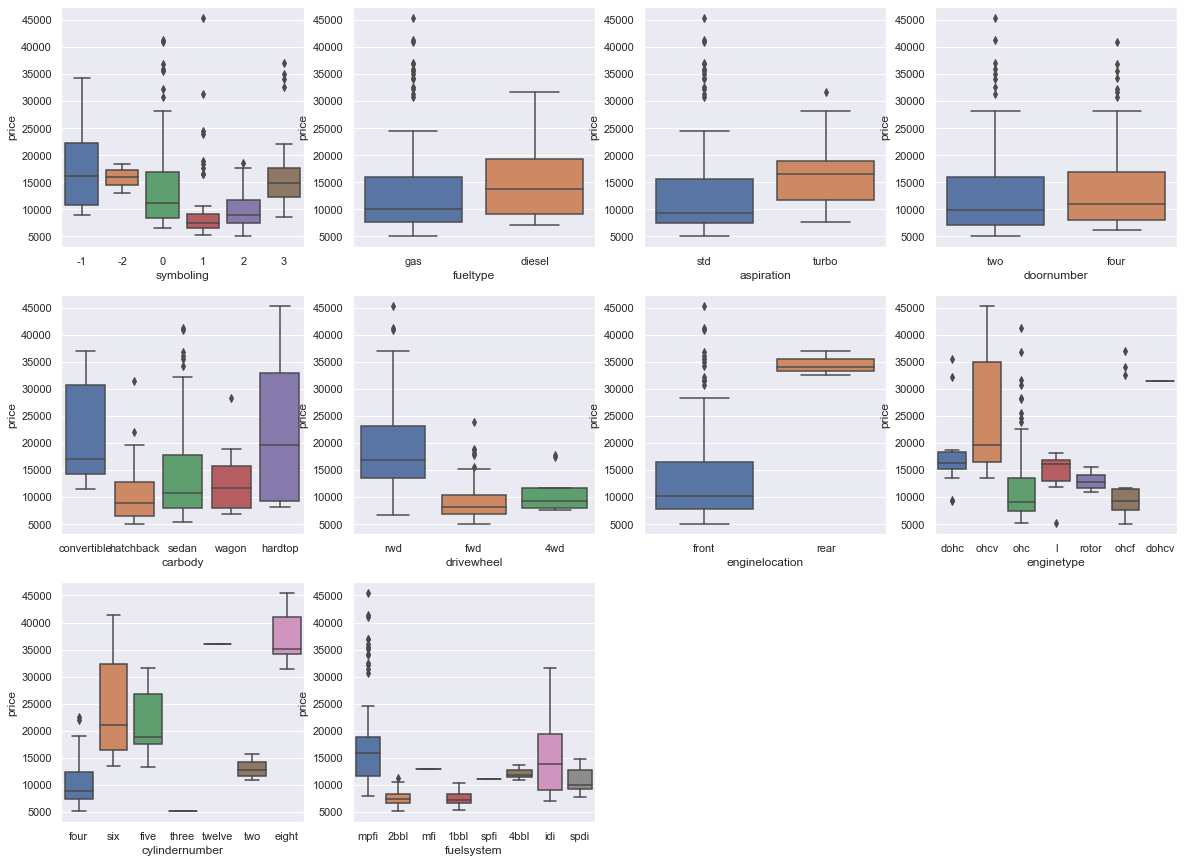

In [35]:
catePlot(cate)

Insight: enginelocation is a good predictor for price, drive wheel is also shows some difference between the price

### Derived Metrics

In [36]:
df['mileage'] = 0.55 * df['citympg'] + 0.45 * df['highwaympg']

In [37]:
df['price'] = df['price'].astype('int')
t = df.copy()
table = t.groupby(['CarName'])['price'].mean()
t = t.merge(table.reset_index(), how='left',on='CarName')
bins = [0,10000,20000,40000]
cars_bin=['Low','Medium','High']
df['range'] = pd.cut(t['price_y'],bins,labels=cars_bin)

significant variables after Visual analysis : 
- Engine Type 
- Fuel type 
- Car Body 
- Aspiration 
- Cylinder Number 
- Drivewheel 
- Engine Size 
- Boreratio 
- Horse Power 
- Wheel base 
- Fuel Economy
- Curbweight 
- Car Length
- Car width
- Range

In [38]:
# Select the columns which are used in creating the model
model_df = df[['price', 'fueltype', 'aspiration','carbody', 'drivewheel','wheelbase',
                  'curbweight', 'enginetype', 'cylindernumber', 'enginesize', 'boreratio','horsepower', 
                    'mileage', 'carlength','carwidth','enginelocation','range']]
model_df.head()

,price,fueltype,aspiration,carbody,drivewheel,wheelbase,curbweight,enginetype,cylindernumber,enginesize,boreratio,horsepower,mileage,carlength,carwidth,enginelocation,range
0,13495,gas,std,convertible,rwd,88.6,2548,dohc,four,130,3.47,111,23.70,168.8,64.1,front,Medium
1,16500,gas,std,convertible,rwd,88.6,2548,dohc,four,130,3.47,111,23.70,168.8,64.1,front,Medium
2,16500,gas,std,hatchback,rwd,94.5,2823,ohcv,six,152,2.68,154,22.15,171.2,65.5,front,Medium
3,13950,gas,std,sedan,fwd,99.8,2337,ohc,four,109,3.19,102,26.70,176.6,66.2,front,Medium
4,17450,gas,std,sedan,4wd,99.4,2824,ohc,five,136,3.19,115,19.80,176.6,66.4,front,Medium


In [39]:
# Encode the variable
model_df['fueltype'] = model_df['fueltype'].map({'gas': 1, 'diesel': 0})
model_df['enginelocation'] = model_df['enginelocation'].map({'front': 1, 'rear': 0})
model_df['aspiration'] = model_df['aspiration'].map({'std': 1, 'turbo': 0})

def dummies(x,df):
    temp = pd.get_dummies(df[x], drop_first = True)
    df = pd.concat([df, temp], axis = 1)
    df.drop([x], axis = 1, inplace = True)
    return df

model_df = dummies('carbody',model_df)
model_df = dummies('drivewheel',model_df)
model_df = dummies('enginetype',model_df)
model_df = dummies('cylindernumber',model_df)
model_df = dummies('range',model_df)

In [40]:
from sklearn.model_selection import train_test_split

np.random.seed(0)
df_train, df_test = train_test_split(model_df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [41]:
# Normalize the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
num_vars = ['wheelbase', 'curbweight', 'enginesize', 'boreratio', 'horsepower','mileage','carlength','carwidth','price']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [42]:
#Dividing data into X and y variables
y_train = df_train.pop('price')
X_train = df_train


In [43]:
X_train.head()

,fueltype,aspiration,wheelbase,curbweight,enginesize,boreratio,horsepower,mileage,carlength,carwidth,enginelocation,hardtop,hatchback,sedan,wagon,fwd,rwd,dohcv,l,ohc,ohcf,ohcv,rotor,five,four,six,three,twelve,two,Medium,High
122,1,1,0.244828,0.272692,0.139623,0.230159,0.083333,0.530864,0.426016,0.291667,1,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
125,1,1,0.272414,0.500388,0.339623,1.000000,0.395833,0.213992,0.452033,0.666667,1,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1
166,1,1,0.272414,0.314973,0.139623,0.444444,0.266667,0.344307,0.448780,0.308333,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,1,1,0.068966,0.411171,0.260377,0.626984,0.262500,0.244170,0.450407,0.316667,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0
199,1,0,0.610345,0.647401,0.260377,0.746032,0.475000,0.122085,0.775610,0.575000,1,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0


In [44]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [45]:
# Use RFE for selecting the columns in rank
lm = LinearRegression()
lm.fit(X_train,y_train)
rfe = RFE(lm, 15)
rfe = rfe.fit(X_train, y_train)
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('fueltype', False, 14),
 ('aspiration', False, 15),
 ('wheelbase', True, 1),
 ('curbweight', True, 1),
 ('enginesize', False, 12),
 ('boreratio', False, 5),
 ('horsepower', True, 1),
 ('mileage', True, 1),
 ('carlength', False, 6),
 ('carwidth', True, 1),
 ('enginelocation', True, 1),
 ('hardtop', True, 1),
 ('hatchback', True, 1),
 ('sedan', True, 1),
 ('wagon', True, 1),
 ('fwd', False, 11),
 ('rwd', False, 13),
 ('dohcv', True, 1),
 ('l', False, 10),
 ('ohc', False, 3),
 ('ohcf', False, 4),
 ('ohcv', False, 8),
 ('rotor', False, 16),
 ('five', False, 2),
 ('four', True, 1),
 ('six', True, 1),
 ('three', False, 9),
 ('twelve', True, 1),
 ('two', False, 17),
 ('Medium', False, 7),
 ('High', True, 1)]

In [46]:
X_train.columns[rfe.support_]

Index(['wheelbase', 'curbweight', 'horsepower', 'mileage', 'carwidth',
       'enginelocation', 'hardtop', 'hatchback', 'sedan', 'wagon', 'dohcv',
       'four', 'six', 'twelve', 'High'],
      dtype='object')

In [47]:
X_train_rfe = X_train[X_train.columns[rfe.support_]]
X_train_rfe.head()

,wheelbase,curbweight,horsepower,mileage,carwidth,enginelocation,hardtop,hatchback,sedan,wagon,dohcv,four,six,twelve,High
122,0.244828,0.272692,0.083333,0.530864,0.291667,1,0,0,1,0,0,1,0,0,0
125,0.272414,0.500388,0.395833,0.213992,0.666667,1,0,1,0,0,0,1,0,0,1
166,0.272414,0.314973,0.266667,0.344307,0.308333,1,0,1,0,0,0,1,0,0,0
1,0.068966,0.411171,0.262500,0.244170,0.316667,1,0,0,0,0,0,1,0,0,0
199,0.610345,0.647401,0.475000,0.122085,0.575000,1,0,0,0,1,0,1,0,0,0


In [48]:
# Create a function for create a model
def model(X,y):
    X = sm.add_constant(X)
    lm = sm.OLS(y,X).fit() 
    print(lm.summary()) 
    return X
    
def VIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

## Model 1

In [49]:
X_train_new = model(X_train_rfe,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     130.8
Date:                Mon, 01 Jun 2020   Prob (F-statistic):           1.63e-69
Time:                        22:06:08   Log-Likelihood:                 217.16
No. Observations:                 143   AIC:                            -402.3
Df Residuals:                     127   BIC:                            -354.9
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2251      0.093      2.

Check the p-value and VIF, if p-value>0.05 then remove the column or VIF is > 5 then remove the column

six has high p-value so remove it
## Model 2

In [50]:
X_train_new = X_train_new.drop(["six"], axis = 1)
X_train_new = model(X_train_new,y_train)
VIF(X_train_new)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     140.4
Date:                Mon, 01 Jun 2020   Prob (F-statistic):           1.87e-70
Time:                        22:06:08   Log-Likelihood:                 216.78
No. Observations:                 143   AIC:                            -403.6
Df Residuals:                     128   BIC:                            -359.1
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2258      0.093      2.

,Features,VIF
0,const,390.31
9,sedan,13.45
2,curbweight,12.62
8,hatchback,11.60
3,horsepower,8.90
1,wheelbase,6.81
10,wagon,6.51
5,carwidth,6.32
4,mileage,3.88
7,hardtop,2.50


## Model 3

In [51]:
X_train_new = X_train_new.drop(["twelve"], axis = 1)
X_train_new = model(X_train_new,y_train)
VIF(X_train_new)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     151.6
Date:                Mon, 01 Jun 2020   Prob (F-statistic):           2.04e-71
Time:                        22:06:08   Log-Likelihood:                 216.43
No. Observations:                 143   AIC:                            -404.9
Df Residuals:                     129   BIC:                            -363.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2469      0.089      2.

,Features,VIF
0,const,358.46
9,sedan,13.33
2,curbweight,12.61
8,hatchback,11.56
3,horsepower,7.82
1,wheelbase,6.71
10,wagon,6.44
5,carwidth,6.29
4,mileage,3.71
7,hardtop,2.49


## Model 5

In [52]:
X_train_new = X_train_new.drop(["wheelbase"], axis = 1)
X_train_new = model(X_train_new,y_train)
VIF(X_train_new)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     162.1
Date:                Mon, 01 Jun 2020   Prob (F-statistic):           5.60e-72
Time:                        22:06:08   Log-Likelihood:                 215.01
No. Observations:                 143   AIC:                            -404.0
Df Residuals:                     130   BIC:                            -365.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2197      0.088      2.

,Features,VIF
0,const,345.47
8,sedan,10.09
7,hatchback,9.48
1,curbweight,8.60
2,horsepower,6.00
4,carwidth,5.21
9,wagon,5.20
3,mileage,3.67
6,hardtop,2.25
11,four,2.05


## Model 6

In [53]:
X_train_new = X_train_new.drop(["mileage"], axis = 1)
X_train_new = model(X_train_new,y_train)
VIF(X_train_new)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     173.7
Date:                Mon, 01 Jun 2020   Prob (F-statistic):           1.89e-72
Time:                        22:06:09   Log-Likelihood:                 213.33
No. Observations:                 143   AIC:                            -402.7
Df Residuals:                     131   BIC:                            -367.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2722      0.083      3.

,Features,VIF
0,const,305.43
7,sedan,9.82
6,hatchback,9.26
1,curbweight,8.44
8,wagon,5.17
3,carwidth,5.16
2,horsepower,4.47
5,hardtop,2.22
10,four,2.04
11,High,1.80


## Model 7

In [54]:
X_train_new = X_train_new.drop(["dohcv"], axis = 1)
X_train_new = model(X_train_new,y_train)
VIF(X_train_new)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.934
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     187.3
Date:                Mon, 01 Jun 2020   Prob (F-statistic):           7.34e-73
Time:                        22:06:09   Log-Likelihood:                 211.47
No. Observations:                 143   AIC:                            -400.9
Df Residuals:                     132   BIC:                            -368.3
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3033      0.082      3.

,Features,VIF
0,const,293.00
7,sedan,9.82
6,hatchback,9.25
1,curbweight,6.99
8,wagon,5.13
3,carwidth,4.72
2,horsepower,3.45
5,hardtop,2.22
9,four,1.99
10,High,1.74


## Model 8

In [55]:
X_train_new = X_train_new.drop(["hardtop"], axis = 1)
X_train_new = model(X_train_new,y_train)
VIF(X_train_new)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     203.0
Date:                Mon, 01 Jun 2020   Prob (F-statistic):           3.62e-73
Time:                        22:06:09   Log-Likelihood:                 209.31
No. Observations:                 143   AIC:                            -398.6
Df Residuals:                     133   BIC:                            -369.0
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2005      0.065      3.

,Features,VIF
0,const,179.39
1,curbweight,6.97
6,sedan,6.76
5,hatchback,6.40
3,carwidth,4.71
7,wagon,3.74
2,horsepower,3.45
8,four,1.99
9,High,1.73
4,enginelocation,1.32


## Model 9

In [56]:
X_train_new = X_train_new.drop(["sedan"], axis = 1)
X_train_new = model(X_train_new,y_train)
VIF(X_train_new)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                     220.2
Date:                Mon, 01 Jun 2020   Prob (F-statistic):           3.58e-73
Time:                        22:06:09   Log-Likelihood:                 206.38
No. Observations:                 143   AIC:                            -394.8
Df Residuals:                     134   BIC:                            -368.1
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1947      0.066      2.

,Features,VIF
0,const,179.13
1,curbweight,6.89
3,carwidth,4.55
2,horsepower,3.42
7,four,1.97
8,High,1.73
5,hatchback,1.30
6,wagon,1.23
4,enginelocation,1.20


## Model 10

In [57]:
X_train_new = X_train_new.drop(["hatchback"], axis = 1)
X_train_new = model(X_train_new,y_train)
VIF(X_train_new)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     241.9
Date:                Mon, 01 Jun 2020   Prob (F-statistic):           3.99e-73
Time:                        22:06:09   Log-Likelihood:                 203.28
No. Observations:                 143   AIC:                            -390.6
Df Residuals:                     135   BIC:                            -366.9
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1937      0.067      2.

,Features,VIF
0,const,179.13
1,curbweight,6.48
3,carwidth,4.55
2,horsepower,3.20
6,four,1.96
7,High,1.71
5,wagon,1.19
4,enginelocation,1.18


## Model 11

In [58]:
X_train_new = X_train_new.drop(["wagon"], axis = 1)
X_train_new = model(X_train_new,y_train)
VIF(X_train_new)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.923
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     272.2
Date:                Mon, 01 Jun 2020   Prob (F-statistic):           3.50e-73
Time:                        22:06:09   Log-Likelihood:                 200.40
No. Observations:                 143   AIC:                            -386.8
Df Residuals:                     136   BIC:                            -366.1
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1875      0.068      2.

,Features,VIF
0,const,178.85
1,curbweight,5.55
3,carwidth,4.36
2,horsepower,3.09
5,four,1.94
6,High,1.68
4,enginelocation,1.17


## Model 12

In [59]:
X_train_new = X_train_new.drop(["curbweight"], axis = 1)
X_train_new = model(X_train_new,y_train)
VIF(X_train_new)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     259.9
Date:                Mon, 01 Jun 2020   Prob (F-statistic):           4.70e-68
Time:                        22:06:09   Log-Likelihood:                 184.96
No. Observations:                 143   AIC:                            -357.9
Df Residuals:                     137   BIC:                            -340.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1649      0.076      2.

,Features,VIF
0,const,178.25
1,horsepower,2.72
2,carwidth,2.16
4,four,1.93
5,High,1.64
3,enginelocation,1.17


## Residual Analysis of Model

In [60]:
lm = sm.OLS(y_train,X_train_new).fit()
y_train_price = lm.predict(X_train_new)

Text(0.5, 0, 'Errors')

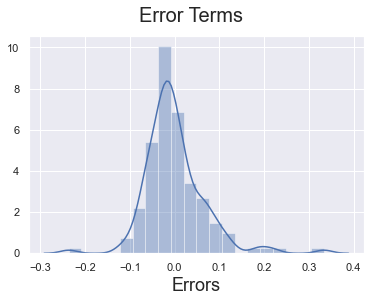

In [61]:
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18) 

## Prediction and Evaluation

In [62]:
num_vars = ['wheelbase', 'curbweight', 'enginesize', 'boreratio', 'horsepower','mileage','carlength','carwidth','price']
df_test[num_vars] = scaler.transform(df_test[num_vars])

In [63]:
y_test = df_test.pop('price')
X_test = df_test

In [64]:
X_train_new = X_train_new.drop('const',axis=1)

X_test_new = X_test[X_train_new.columns]
X_test_new = sm.add_constant(X_test_new)

In [65]:
y_pred = lm.predict(X_test_new)

In [66]:
# Calculate the R2 Score
from sklearn.metrics import r2_score 
r2_score(y_test, y_pred)

0.9085472125185498

Text(0, 0.5, 'y_pred')

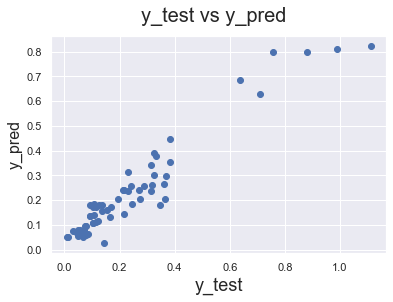

In [67]:
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)               
plt.xlabel('y_test', fontsize=18)                          
plt.ylabel('y_pred', fontsize=16)